## OPTIMIZING FUEL EFFICIENCY: A COMPARATIVE ANALYSIS OF REGRESSION MODELS ON THE AUTO MPG DATASET

# 1. ABOUT THE DATA
The Auto MPG data set comprises several automobile attributes, including MPG (miles per gallon), cylinders, displacement, horsepower, weight, acceleration, model year, origin, and car name. This rich data set allows for an exploration of how various vehicle characteristics impact fuel efficiency.
Source of the dataset: [Auto MPG Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/auto-mpg-dataset).

# 2. OBJECTIVES
The main objective of this analysis is predictive: to model and predict a vehicle's fuel efficiency (MPG) based on its characteristics using regression techniques. The aim is to identify which factors most strongly predict MPG, aiding in both vehicle design and consumer choice.

## Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



## Importing the Dataset

In [6]:
# Loading the dataset
data = pd.read_csv('auto-mpg.csv', delimiter=',')


In [7]:
# Displaying the first few rows of the dataset to understand its structure
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
# Checking for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Converting 'horsepower' to numeric, coercing errors to NaN so we can handle them
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# After conversion, check again for missing values
missing_values_after_conversion = data.isnull().sum()

missing_values, data_types, missing_values_after_conversion


(mpg             0
 cylinders       0
 displacement    0
 horsepower      0
 weight          0
 acceleration    0
 model year      0
 origin          0
 car name        0
 dtype: int64,
 mpg             float64
 cylinders         int64
 displacement    float64
 horsepower       object
 weight            int64
 acceleration    float64
 model year        int64
 origin            int64
 car name         object
 dtype: object,
 mpg             0
 cylinders       0
 displacement    0
 horsepower      6
 weight          0
 acceleration    0
 model year      0
 origin          0
 car name        0
 dtype: int64)

In [9]:
# Statistical Summary of the Data

summary = data.describe()
summary


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


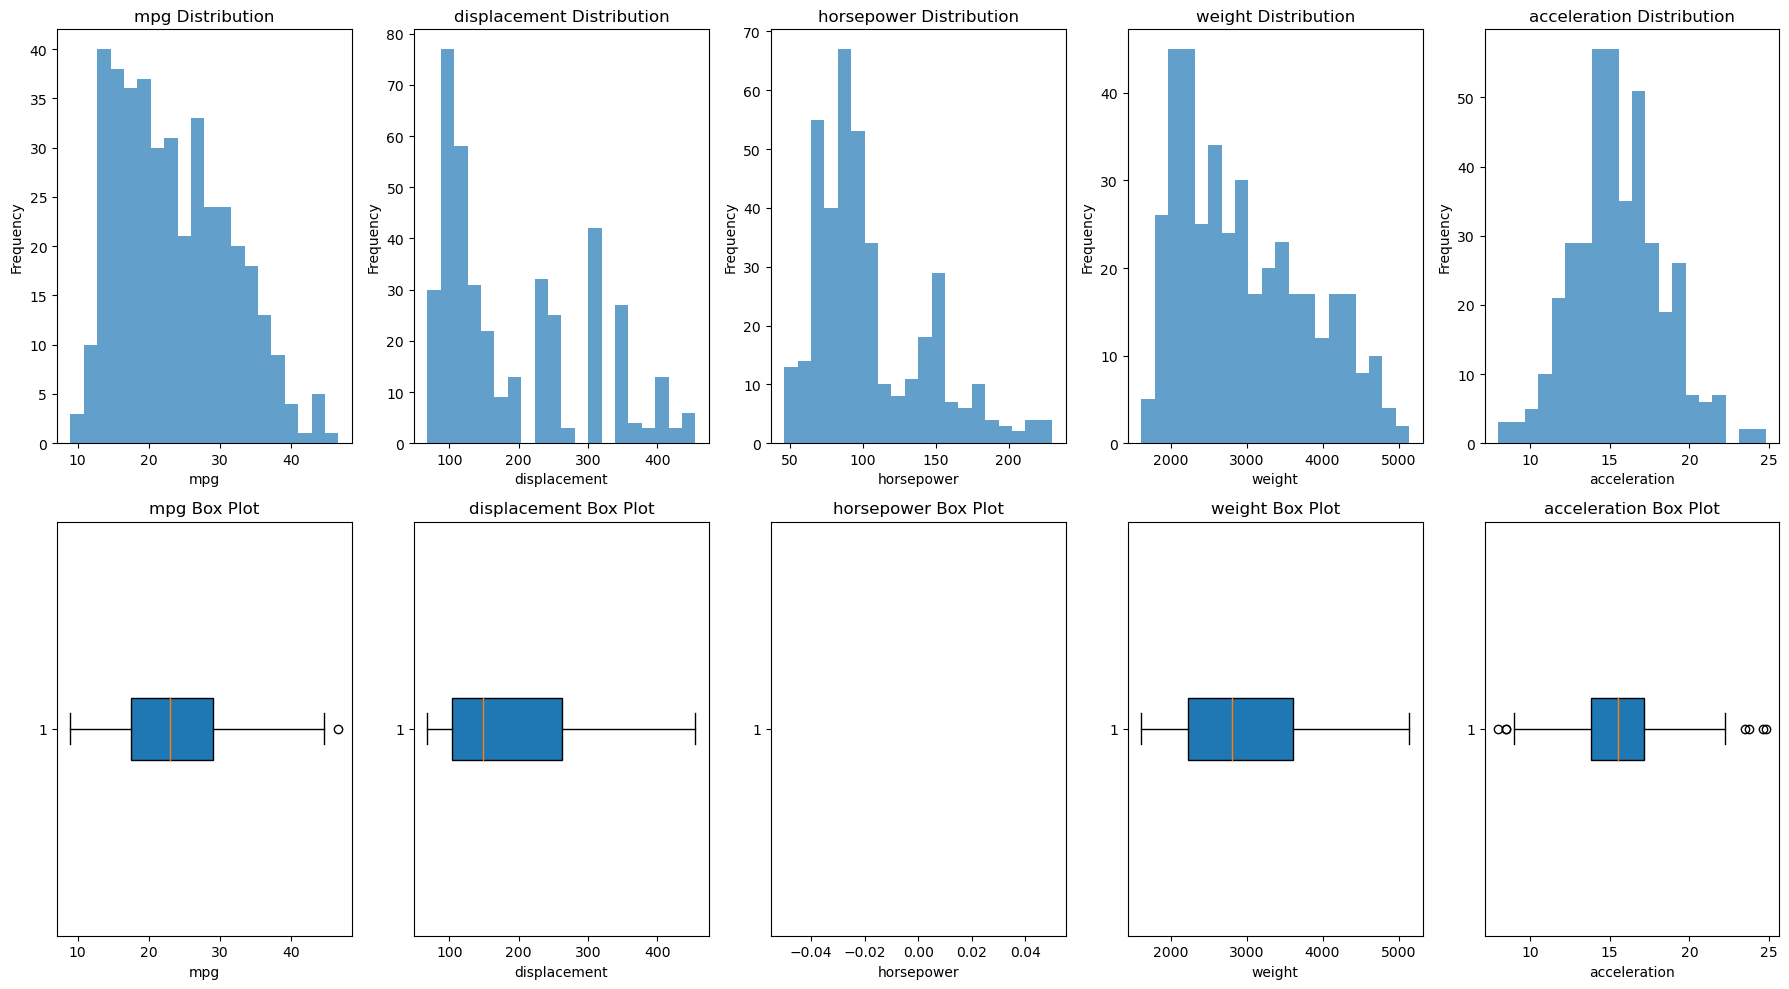

In [10]:
# Setting up the figure size and layout
plt.figure(figsize=(18, 10))

# Histograms for numerical features
features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
n = 1
for feature in features:
    plt.subplot(2, 5, n)
    plt.hist(data[feature], bins=20, alpha=0.7, label=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')
    n += 1

# Box plots for the same features to identify outliers
for feature in features:
    plt.subplot(2, 5, n)
    plt.boxplot(data[feature], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature} Box Plot')
    n += 1

plt.tight_layout()
plt.show()


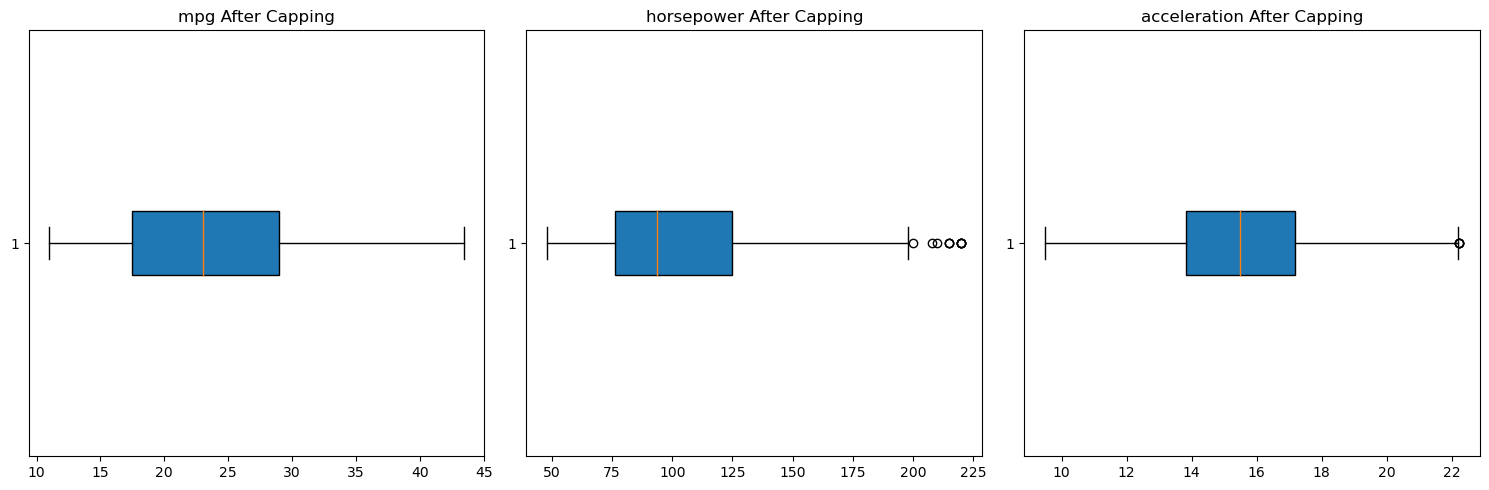

In [11]:
# Re-impute missing values for 'horsepower' after reset
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

# Function to cap outliers
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    lower_limit = series.quantile(lower_percentile / 100)
    upper_limit = series.quantile(upper_percentile / 100)
    return np.where(series < lower_limit, lower_limit, 
                    np.where(series > upper_limit, upper_limit, series))

# Capping outliers in 'mpg', 'horsepower', and 'acceleration'
data['mpg'] = cap_outliers(data['mpg'])
data['horsepower'] = cap_outliers(data['horsepower'])
data['acceleration'] = cap_outliers(data['acceleration'])

# Display box plots after capping to verify changes
plt.figure(figsize=(15, 5))
features_to_plot = ['mpg', 'horsepower', 'acceleration']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(data[feature], vert=False, patch_artist=True)
    plt.title(f'{feature} After Capping')
plt.tight_layout()
plt.show()


# EDA and Preprocessing Steps
The Exploratory Data Analysis (EDA) and preprocessing involved initially examining the data set for structure, missing values, and data types. Key steps included:

Converting 'horsepower': Initially an object type due to non-numeric entries, it was converted to numeric, with errors coerced to NaN for subsequent handling.
Handling Missing Values: Missing values in 'horsepower' were imputed with the median value.
Outlier Treatment: Outliers in 'mpg', 'horsepower', and 'acceleration' were capped at the 1st and 99th percentiles, mitigating extreme values' influence.
Visualization: Histograms and box plots highlighted data distributions and outliers, guiding the pre-processing strategy.

# 3. LINEAR REGRESSION MODELS
Three variations of regression models were trained:

Simple Linear Regression: Served as the baseline model.
Polynomial Regression: Enhanced the baseline by capturing non-linear relationships.
Ridge Regression: Added regularization to prevent overfitting.

In [12]:
# Prepare the data
X = data.drop(['mpg', 'car name'], axis=1)
y = data['mpg']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((318, 7), (80, 7), (318,), (80,))

In [13]:
# Define features and target variable
X = data.drop(['mpg', 'car name'], axis=1)  # Exclude 'car name'
y = data['mpg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression
# Initialize the model
linear_model = LinearRegression()
# Train the model
linear_model.fit(X_train, y_train)
# Predict on training and test sets
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

### Polynomial Regression
# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Train the model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# Predict on training and test sets
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

### Ridge Regression
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
# Predict on training and test sets
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
metrics = {
    'Linear Regression': {
        'Train': (y_train, y_train_pred_linear),
        'Test': (y_test, y_test_pred_linear)
    },
    'Polynomial Regression': {
        'Train': (y_train, y_train_pred_poly),
        'Test': (y_test, y_test_pred_poly)
    },
    'Ridge Regression': {
        'Train': (y_train, y_train_pred_ridge),
        'Test': (y_test, y_test_pred_ridge)
    }
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R-squared": r2_score(y_true, y_pred)
    }

# Storing metrics for each model
results = {model: {split: calculate_metrics(y_true, y_pred) for split, (y_true, y_pred) in splits.items()}
           for model, splits in metrics.items()}

results


{'Linear Regression': {'Train': {'MSE': 11.369991944804905,
   'RMSE': 3.3719418655731457,
   'MAE': 2.58597452563921,
   'R-squared': 0.8158714101256239},
  'Test': {'MSE': 8.130333927403303,
   'RMSE': 2.851374042002084,
   'MAE': 2.250620492624506,
   'R-squared': 0.8470336044314011}},
 'Polynomial Regression': {'Train': {'MSE': 6.702241828702417,
   'RMSE': 2.588868831884384,
   'MAE': 1.9120433748310093,
   'R-squared': 0.8914621626025073},
  'Test': {'MSE': 6.212390002136076,
   'RMSE': 2.4924666501552384,
   'MAE': 1.8623750523993745,
   'R-squared': 0.8831183423733417}},
 'Ridge Regression': {'Train': {'MSE': 11.370037899124263,
   'RMSE': 3.3719486797880336,
   'MAE': 2.586094964097056,
   'R-squared': 0.8158706659294923},
  'Test': {'MSE': 8.135533296066544,
   'RMSE': 2.8522856266626846,
   'MAE': 2.251428021469738,
   'R-squared': 0.8469357820429543}}}

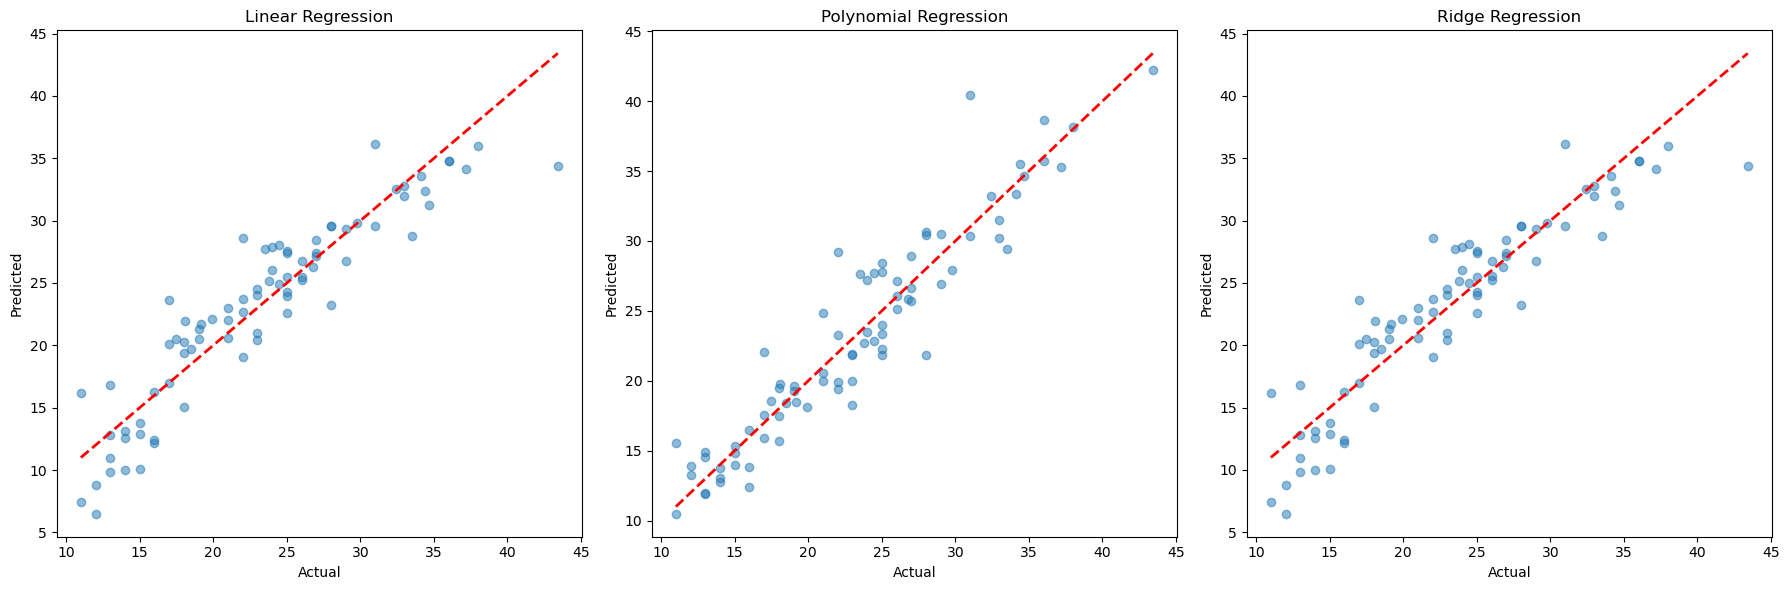

In [14]:
# Plotting regression graphs for the test set predictions of each model
plt.figure(figsize=(18, 6))

titles = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression']
predictions = [y_test_pred_linear, y_test_pred_poly, y_test_pred_ridge]

for i, (title, pred) in enumerate(zip(titles, predictions), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)

plt.tight_layout()
plt.show()


# 4. INSIGHTS AND KEY FINDINGS
The analysis revealed that the Polynomial Regression model excels in predicting vehicle MPG, demonstrating superior accuracy through lower MSE, RME, and MAE, and achieving high R-squared values on both training and test sets. This suggests a well-balanced model adept at capturing the intricate, non-linear relationships within the data. Notably, there's no evidence of overfitting or underfitting, indicating the model's robustness and reliability for both analysis and predictive purposes.

# 5. NEXT STEPS
Given the success of the Polynomial Regression model, future analyses could explore:

-Higher-degree polynomial features for more complex relationships.
-Feature selection techniques to refine the model.
-Cross-validation for more robust model evaluation.

This analysis has shown that with careful preprocessing and model selection, significant insights can be drawn from the Auto MPG dataset, guiding both design and consumer decisions towards more fuel-efficient vehicles.